# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Draft project title if you have one (can be changed later)

(This checkpoint helps you to perform your EDA on your data for your project. You can remove this text description. Consider this the next step in your final project. See the project readme for bullet points to check off in terms of details to include beyond the main section heading content below.)

# Names

- Rawan Ghazouli
- Nargis Ahmadi
- Jana Bridi

<a id='research_question'></a>
# Research Question

Are hate crimes motivated by racial prejudice significantly more prevalent than hate crimes motivated by other factors in the distribution of hate crimes in San Diego in the past 7 years?

# Setup

In [1]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

# Upload the dataset into Github public repository 

# The datset is in CSV file
# Use the following code to read the file 
data_path = 'https://raw.githubusercontent.com/wanzouli/team18_selfcreated/main/hate_crimes_datasd.csv'
df = pd.read_csv(data_path)

df.head()      # Display the first few rows of the dataset
# df.info()      # Summary information about the dataset
# df.describe()  # Descriptive statistics of numerical columns

,case_number,date,year,month,time,date_time,crime_code,crime,block,street,...,suspect_sex_1,suspect_sex_2,victim_race_0,victim_race_1,victim_race_2,victim_race_3,victim_sex_0,victim_sex_1,victim_sex_2,victim_sex_3
0,16000456,2016-01-04,2016,1,2:00:00 AM,2016-01-04,243(D)M,"Assault, No Weapon",500.0,G,...,M,M,O,NaN,NaN,NaN,M,NaN,NaN,NaN
1,16001278,2016-01-10,2016,1,1:30:00 AM,2016-01-10,245A1,"Assault, w/Weapon",3400.0,30th,...,M,M,B,NaN,NaN,NaN,M,NaN,NaN,NaN
2,16004522,2016-01-31,2016,1,02:30:00,2016-01-31,594(B)(4),Vandalism,1400.0,Imperial,...,NaN,NaN,H,W,NaN,NaN,F,M,NaN,NaN
3,16005962,2016-02-09,2016,2,4:30:00 PM,2016-02-09,422.22(a)(4),"Threat, Phone Call",4100.0,Ute,...,NaN,NaN,B,NaN,NaN,NaN,M,NaN,NaN,NaN
4,16005900,2016-02-10,2016,2,00:45:00,2016-02-10,417A1:M,Threat,100.0,University,...,NaN,NaN,B,A,NaN,NaN,M,F,NaN,NaN


# Data Cleaning

After the data was retrieved as a csv file from the Police department dataset, it was uploaded on Jupyter for cleaning. The unneccsary columns that were not needed for the analyses were removed and the variables of inerest were selected as the new dataset.

In [2]:
## YOUR CODE HERE


# to select the columns that we need to answer our research question 

df = df.loc[:, ['year', 'crime', 'motivation', 'weapon', 'injury']]
df.head() 

,year,crime,motivation,weapon,injury
0,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",Hospital
1,2016,"Assault, w/Weapon",Race,Stick,No Treat.
2,2016,Vandalism,Race,Marker,None
3,2016,"Threat, Phone Call",Race,Phone,None
4,2016,Threat,Race,Knife,None


In [3]:
# Assuming the DataFrame is named df

df = df[df['motivation'].isin(['Race', 'Sexual Orientation'])]


# Display the updated DataFrame
print(df)


#remove any missing values from the dataframe
df= df.dropna()

df.head(20)

     year               crime motivation              weapon     injury
0    2016  Assault, No Weapon       Race  Hands, Fists, Feet   Hospital
1    2016   Assault, w/Weapon       Race               Stick  No Treat.
2    2016           Vandalism       Race              Marker       None
3    2016  Threat, Phone Call       Race               Phone       None
4    2016              Threat       Race               Knife       None
..    ...                 ...        ...                 ...        ...
260  2022             Assault       Race  Hands, Fists, Feet      Minor
261  2022             Battery       Race  Hands, Fists, Feet      Minor
262  2022             Battery       Race  Hands, Fists, Feet      Minor
264  2022              Threat       Race                None       None
265  2022             Battery       Race  Hands, Fists, Feet       None

[198 rows x 5 columns]


,year,crime,motivation,weapon,injury
0,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",Hospital
1,2016,"Assault, w/Weapon",Race,Stick,No Treat.
2,2016,Vandalism,Race,Marker,None
3,2016,"Threat, Phone Call",Race,Phone,None
4,2016,Threat,Race,Knife,None
5,2016,Vandalism,Race,Paint,None
8,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",No Treat.
9,2016,Threat,Race,Knife,None
10,2016,Other,Race,Knife,None
11,2016,"Threat, Phone Call",Race,Phone,None


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

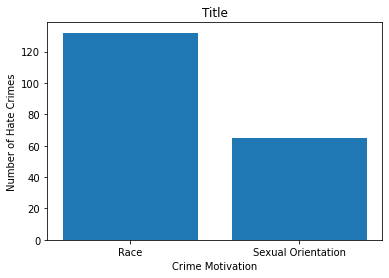

In [4]:
## YOUR CODE HERE
df = df['motivation'].value_counts()
plt.bar(['Race', 'Sexual Orientation'], df.values)
plt.xlabel('Crime Motivation')
plt.ylabel('Number of Hate Crimes')
plt.title('Title')
plt.show()
